# **Cálculo de los exponentes críticos de la percolación de sitio en dos dimensiones**

F. R. Hernández Gáfaro, N. A. Rodríguez Mora, D. A. Tinoco Villalba

En este Notebook encontrará cada una de las etapas que realizamos como equipo para cumplir con los objetivos del proyecto. Primero, estudiamos el concepto de percolación y algunas de sus aplicaciones. Después, nos centramos en la teoría de percolación por sitio en 2 dimensiones y en desarrollar el código necesario para su modelación. Posteriormente definimos algunas cantidades relacionadas a los clusters. Y finalmente hicimos el cálculo de los exponentes críticos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn
import scipy as sp

# **Introducción a la Percolación**

La percolación es el proceso por el cual se van ocupando aleatoriamente regiones del espacio (o se van agregando enlaces entre nodos) hasta tener una estructura conectada (*el cluster percolante*) que atraviesa de lado a lado todo el sistema. El sistema pasa así de una fase disconexa a una fase conexa.

Pero, ¿Cómo aterrizar esta teoría a la realidad?

Para esto, se plantean los siguientes ejemplos:


## **Ejemplos**

- Extracción de petróleo:

Una de las primeras aplicaciones de la teoría de la percolación, debido a su utilidad industrial, fue aplicarlo a la extracción de petróleo. La idea es básicamente la siguiente: Observe la imagen, la cual representa un material poroso en contacto con un líquido (lo blanco) ¿Podrá el líquido pasar de un agujero a otro y llegar al fondo? ¿Podrá el líquido atravesar completamente el material de un lado a otro? ¿Podrá ***percolar*** el petróleo? ¿Con qué probabilidad?.

Bueno, pues la percolación busca responder estas preguntas a partir de un tratamiento probabilístico.

- Hay muchos más ejemplos, como el estudio del tráfico (para determinar cómo el tráfico puede pasar de flujo libre a flujo congestionado), o incluso de incendios forestales (para estudiar la propagación de los incendios).


# **Modelo**

Un modelo simplificado es el siguiente: Imaginemos que tenemos un material poroso y dividimos este material en cubos muy pequeños de tamaño d. Estos cubos pequeños son llamados ***SITIOS*** (o celdas), y la suma de todos estos sitios conforman ***la rejilla*** o ***red***. Cada sitio puede estar vacío o lleno.

Extendiendo este modelo a un medio aleatorio: Para obtener la red, se genera una matriz **aleatoria** de tamaño LxL, donde cada una de las celdas está llena con una probabilidad **p**. De esta forma se puede analizar la red cambiando la probabilidad y preguntarnos ¿Cuándo se forma un camino de un lado a otro de la muestra? ¿A qué valor de p esto sucede? Al valor de p donde se genera un camino de un lado a otro de la red lo llamamos $p_c=$ ***umbral de percolación*** (como la red se genera de forma aleatoria, este valor cambia en cada realización, por lo cual se calcula hallando el promedio de muchas realizaciones).

**Definiciones:**

- Dos sitios están conectados si son ***vecinos cercanos***, esto es, que se conectan en sus aristas y no en sus esquinas (4 vecinos
en una red cuadrada).

- La ***conectividad Z*** corresponde al número de conexiones o vecinos que tiene un sitio.

- Un ***clúster*** es un conjunto de sitios conectados.

- Un clúster ***se extiende*** si va de un lado al lado opuesto de la red.

- Un clúster que se extiende se denomina ***clúster percolante***.

- Un sistema es percolador si hay un clúster percolante en el sistema.

A continuación realizaremos algunos códigos para el mejor entendimiento del modelo a usar:

## **Visualización e identificación de los clusters**


Aquí generamos una matriz aleatoria de tamaño LxL (10X10), y asumimos que los sitios ocupados son los hoyos en los poros del material.

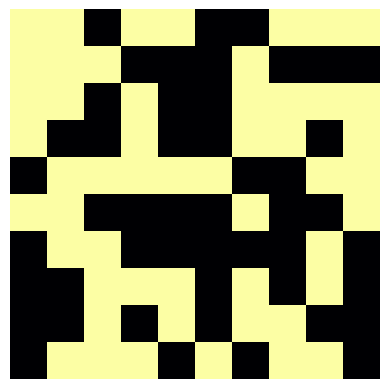

In [ ]:
L = 10   #Tamaño del sistema
p = 0.5  #Probabilidad de que un sitio sea ocupado
z = rn.rand(L,L)   #Matríz LxL con valores aleatorios entre 0 y 1
m = z < p   #Matríz LxL con valores True o False según si su valor correspondiente en z es menor a p o no

plt.imshow(m, cmap='inferno')
plt.axis('off')
plt.show()

Se puede observar que el valor de p=0.5 no fue suficiente para que el sistema percolara.

Ahora se genera una visualización de los clusters de la red:

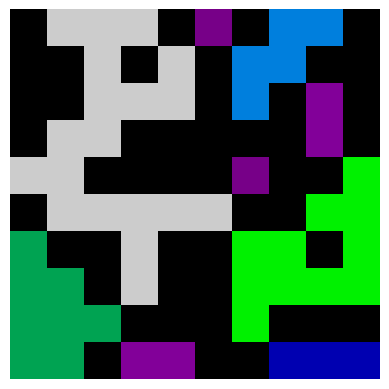

In [ ]:
lw, num = sp.ndimage.label(m) #lw es la matríz m pero identificando cada cluster con un número, num es el número de clusters
area = sp.ndimage.sum(m, lw, index = np.arange(num + 1)) #Arreglo con el área de cada cluster
areaImg = area[lw] #Matríz que intercambia el número que identifica el cluster por su tamaño (solo necesaria para graficar)

plt.imshow(areaImg, origin='lower', cmap='nipy_spectral') #La imagen mostrada es un espejo la matríz original
plt.axis('off')
plt.show()

## **¿Cómo se comportan los clusters para diferentes valores de p?**

Realizamos el mismo proceso anterior pero para diferentes valores de p.

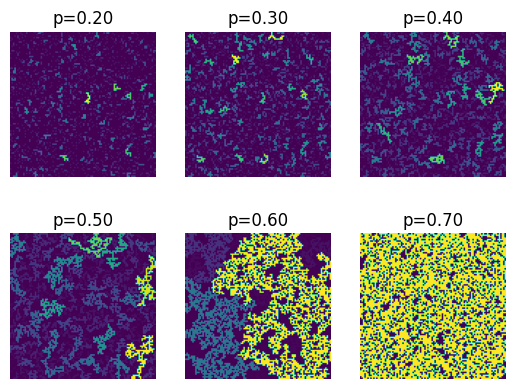

In [ ]:
L = 100 #Tamaño de 100x100
pv = np.linspace(0.2, 0.7, 6)  #Valores de p que se utilizarán
z = rn.rand(L, L)
for i in range(len(pv)):
    p = pv[i]
    m = z < p
    lw, num = sp.ndimage.label(m)
    area = sp.ndimage.sum(m, lw, index=np.arange(lw.max()+1))
    areaImg = area[lw]
    plt.subplot(2, 3, i+1)
    plt.imshow(areaImg, origin='lower') #Cuando p es mayor o igual a 0.6, es posible ver percolación
    plt.title(f'p={p:.2f}')
    plt.axis("off")

Se observa que en $p=0.6$ ya hay un cluster percolante, lo que nos sugiere que $p_c$ puede estar entre 0.5 y 0.6

# **¿Cuál es la probabilidad de que haya al menos un cluster percolante según el valor de p?**


Aquí se intentará encontrar cuándo percola el sistema, es decir, cuándo existe un camino que conecta un lado con otro. Esto ocurre en algún valor $p = p_c$. Sin embargo, en un sistema finito, como el sistema que hemos simulado anteriormente, el valor de $p_c$ para una realización dada variará con cada realización. Puede estar ligeramente por encima o por debajo del pc que encontramos en una muestra infinita. Por lo tanto, se caracteriza este comportamiento definiendo:

- ***Probabilidad de percolación*** $∏(p, L)$: es la probabilidad de que haya un clúster percolante en función de $p$ en un sistema de tamaño $L$.

Podemos medir $∏(p, L)$ en una muestra finita de tamaño $LxL$, generando muchas matrices aleatorias (Monte Carlo). Para cada matriz, realizamos un análisis de clústers para una secuencia de valores $p_i$ (lo que hicimos anteriormente). A continuación, comprobamos si alguno de los clúster está presente tanto en un extremo como en el otro de la red, es decir, verificamos si uno de ellos percola. Posteriormente, contamos cuántas veces percola un sistema para un $p_i$ dado ($N_i$), y luego lo dividimos por el número total de experimentos ($N$), para estimar la probabilidad de percolación para un $p_i$ dado. Luego $∏(p_i, L) ≃ N_i/N$.

In [ ]:
#Tarda unos 11min

p = np.linspace(0.4, 0.8, 150)   #Se van a utilizar 150 valores de p entre 0.3 y 1
nx = len(p)
Ni = np.zeros(nx) #En esta lista se pondrá cuántas veces percola un sistema para un p_i
N = 100  #Se toman cien muestras
L = 1500   #Tamaño del sistema

for i in range(N): #Se hace un loop para cada una de las muestras
    z = rn.rand(L,L) #Se genera una matriz diferente por cada muestra
    for ip in range(nx): #Se genera un ciclo para cada valor de p a estudiar
      m = z < p[ip] #Se encuentran los sitios ocupados
      lw, num = sp.ndimage.label(m) #Se hallan los clusters
      #Encontramos los elementos comunes entre un extremo y otro, tanto de izquierda a derecha como de arriba a abajo
      #Esto es, encontrar los clusters percolantes
      perc_y = np.intersect1d(lw[0, :], lw[-1, :])
      perc_x = np.intersect1d(lw[:, 0], lw[:, -1])
      #Creamos un array con el numero de clusters que percola
      perc = np.concatenate((perc_x[np.where(perc_x > 0)], perc_y[np.where(perc_y > 0)]))
      if len(perc) > 0: #Contamos cuántos clusters percolantes hay para cada p_i
        Ni[ip] += 1

Pi = Ni/N

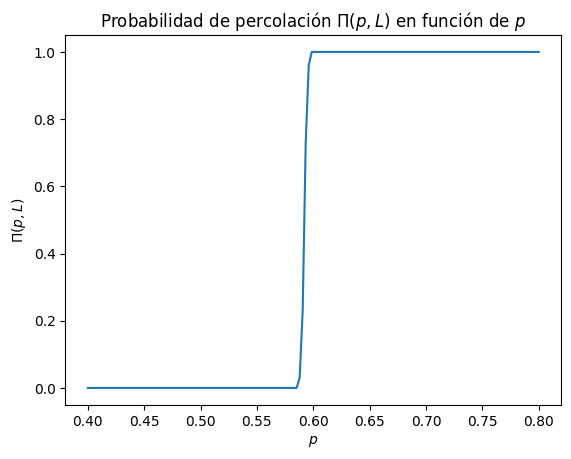

In [ ]:
plt.plot(p, Pi)
plt.xlabel('$p$')
plt.ylabel('$\Pi(p,L)$')
plt.title(r'Probabilidad de percolación $\Pi(p,L)$ en función de $p$')
plt.show()

## Estimación de $p_c$


En nuestro caso de una red cuadrada en 2D, $p_c$ no puede calcularse exactamente, aunque hay casos en los que sí. Por lo tanto, tenemos que encontrar el valor de $p_c$ para esta red cuadrada de forma numérica, con $N = 100$ muestras y un tamaño de red de $1500$x$1500$. Sin embargo, este valor mejorará entre más grande la red, por lo que para una red infinita, $p_c ≃ 0.5927$ (valor teórico).

Para estimar $p_c$ tomamos el primer valor para el cual $\Pi(p, L) > 0$ y el último valor para el cual $\Pi(p, L) < 1$ y se promediaron.

In [ ]:
posicion = []
for i, valor in enumerate(Pi):
  if valor != 0 and valor < 1:
    posicion.append(i)

# Imprimir el primer valor diferente de 0
print((p[posicion[0]] + p[posicion[-1]])/2)

0.5919463087248322


Algo a resaltar es ***el principio de universalidad*** que establece que el valor numérico de $p_c$ está determinado por la estructura local del gráfico, mientras que el comportamiento cerca de $p_c$ se caracteriza por un exponente crítico universal. Esta universalidad significa que para una dimensión dada, los diversos exponentes críticos en $p_c$ son independientes del tipo de red y del tipo de percolación (por ejemplo, enlace o sitio).

# **Exponentes críticos**

## Longitud de correlación $\xi$

También podemos medir el tamaño típico de un conglomerado a partir de la función de correlación correlación. La función de correlación $g(r, p)$, que es la probabilidad de que dos sitios, apartados a una distancia r, estén conectados y formen parte del mismo conglomerado para un sistema con una probabilidad de ocupación $p$. Podemos usar para definir la distancia media al cuadrado entre dos sitios $i$ y $j$ pertenecientes al mismo clúster como:

$$
\xi=\left\langle\frac{\sum_jr_{ij}^2g(r_{ij},p)}{\sum_j g(r_{ij},p)}\right\rangle_i
$$

## Método de escalado finito

Para calcular los exponentes críticos usaremos el método de escalado finito, debido a que para redes finitas, como la usada en este trabajo, calcular los exponentes críticos puede ser una tarea imposible teniendo en cuenta los límites computacionales existentes.

Tenemos que un sistema de percolación se describe mediante tres escalas de longitud: el **tamaño de un sitio**, el **tamaño del sistema** $L$ y la **longitud de correlación** $\xi$. El escalado finito aborda el cambio en el comportamiento de un sistema a medida que cambiamos el tamaño $L$ del sistema.

Normalmente, dividimos el comportamiento en dos categorías:


- $L \ll \xi$, el sistema parece estar en el umbral de percolación.    
- $L \gg \xi$, la geometría es esencialmente homogénea a longitudes superiores a $\xi$.


Vamos ahora a mirar el comportamiento cerca a $p_c$, donde se comportan como leyes de potencias en $p-p_c$, como por ejemplo, la masa de un cluster percolante: $M(p) \propto\left(p-p_c\right)^{-x}$, con $x$ el exponente que determina su comportamiento cerca a $p_c$, denominado **exponente crítico**.

En escalamiento vamos a asumir que el sistema se comporta como:

\begin{equation}
    M(p, L)=L^{\frac{x}{\nu}} f\left(\frac{L}{\xi}\right)=\xi^{x / \nu} \tilde{f}(L / \xi)
\end{equation}

con $f\left(\frac{L}{\xi}\right)$ una función desconocida.

El método de escalado finito nos permitirá encontrar los exponentes críticos graficando las magnitudes asociadas al comportamiento de los clústers en función de $L$. Más concretamente, se obtendrá un valor para $x/\nu$ que multiplicando por el valor teórico de $\nu$ permitirá estimar el valor del exponente crítico $x$.

## Longitud de correlación $\xi$ y $ν=4/3$

Por una parte, tenemos que la longitud de correlación $\xi$ es proporcional a $|{p-p_c}|^{-\nu}$:

$$
\xi ∝ |{p-p_c}|^{-\nu}
$$

Sin embargo, no es posible encontrar este valor de $\nu$ a partir de esta expresión, por lo cual se hará el cálculo a partir de una relación dada por el método de escalamiento finito:

$$p_{x_1}-p_{x_2}=(C_{x_1}-C_{x_2})L^{-1/\nu}$$

La cual nos hace generar gráficos de $p_x$ en función de $L^{-1/ν}$ para varios valores de $x$. Luego realizamos un ajuste lineal tal que podamos encontrar el exponente $-1/\nu$ y por lo tanto, $\nu$.

In [ ]:
pnu = np.linspace(0.5, 0.7, 200)  #Se van a utilizar 200 valores de p entre 0.7
nxnu = len(pnu)
Ninu = np.zeros(nxnu) #En esta lista se pondrá cuántas veces percola un sistema para un p_i
Nnu = 500 #Se toman 500 muestras
Lnu = np.array([25, 50, 75, 100, 150, 200, 400])
Pinu = np.zeros((len(Lnu), len(pnu)))
for k in range(len(Lnu)):
    for i in range(Nnu): #Se hace un loop para cada una de las muestras
        z = rn.rand(Lnu[k], Lnu[k]) #Se genera una matriz diferente por cada muestra
        for ip in range(nxnu): #Se genera un ciclo para cada valor de p a estudiar
          m = z < pnu[ip] #Se encuentran los sitios ocupados
          lw, num = sp.ndimage.label(m) #Se hallan los clusters
          perc_y = np.intersect1d(lw[0, :], lw[-1, :])
          perc_x = np.intersect1d(lw[:, 0], lw[:, -1])
          perc = np.concatenate((perc_x[np.where(perc_x > 0)], perc_y[np.where(perc_y > 0)]))
          if len(perc) > 0: #Contamos cuántos clusters percolantes hay para cada p_i
            Ninu[ip] += 1
    Pinu[k] = Ninu/Nnu
    Ninu = np.zeros(nxnu)

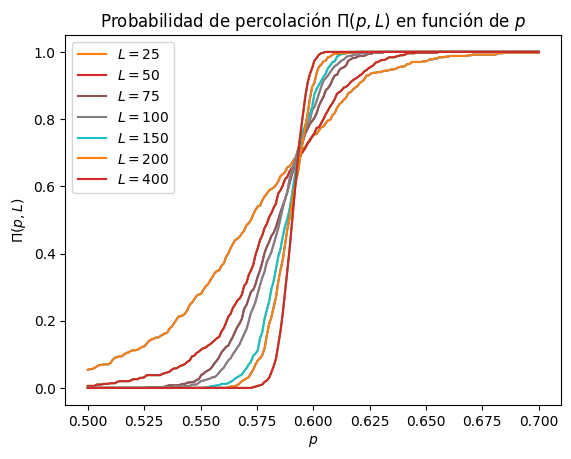

In [ ]:
for i in range(len(Lnu)):
    L = Lnu[i]
    plt.plot(pnu, Pinu[i])
    lab = "$L="+str(L)+"$"
    plt.plot(pnu, Pinu[i],label=lab)
    plt.legend()
plt.xlabel('$p$')
plt.ylabel('$\Pi(p,L)$')
plt.title(r'Probabilidad de percolación $\Pi(p,L)$ en función de $p$')
plt.show()

In [ ]:
p03 = []
p08 = []
for i in range(len(Pinu)):
    p03.append(pnu[Pinu[i] > 0.3][0])
    p08.append(pnu[Pinu[i] > 0.8][0])

diff = np.array(p08) - np.array(p03)

In [ ]:
def function(x, a, b):
    return a*x**b

poptnu, pcovnu = sp.optimize.curve_fit(function, Lnu, diff)
perrnu = np.sqrt(np.diag(pcovnu))

print(-1/poptnu[1], (-1/poptnu[1]**2)*perrnu[1])

1.2962778577090668 -0.01827876589241437


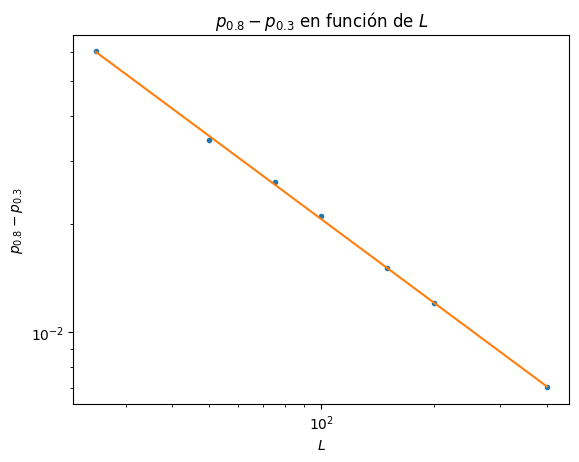

In [ ]:
plt.loglog(Lnu, diff, '.')
plt.loglog(Lnu, function(Lnu, poptnu[0], poptnu[1]))
plt.xlabel('$L$')
plt.ylabel('$p_{0.8}-p_{0.3}$')
plt.title(r'$p_{0.8}-p_{0.3}$ en función de $L$')
plt.show()

Luego el valor encontrado fue $\nu=1.30 \pm 0.02$.



## Densidad del cluster percolante y $β=5/36$

Ahora, vamos a estudiar el tamaño $M_S$ de los clusters percolantes mediante su densidad $P(p,L)=M_S/L^2$.

- La ***densidad del cluster percolante*** es la probabilidad $P(p,L)$ de que un sitio pertenezca a un cluster percolante.

Para encontrar este valor, primero necesitamos encontrar la 'masa' $M_i$ de un cluster percolante para un valor de $p_i$. Esto se realiza contando el número de sitios del cluster percolante. Y finalmente se divide por el tamaño de la matriz ($L^2$).

Por otra parte, la densidad de cluster percolante cumple:

$$
P(p) ∝ (p-p_c)^{β}
$$

Sin embargo, por escalamiento finito, cuando $p→p_c$, en el límite cuando $L<<\xi$, se cumple:

$$
P(p_c, L) ∝ L^{-\beta/\nu}
$$

Esta es la relación que usaremos para encontrar el valor de $\beta$. Luego graficamos $P$ vs $L$ en escala logarítmica y la pendiente $m$ debe ser $-\beta/\nu$, luego $\beta=-m\nu=-4m/3$

In [ ]:
pb = np.linspace(0.55, 0.65, 100)
nxb = len(pb)
Nb = 2000
Lb = np.linspace(50, 200, 8)
plb = []
pcb = 0.59275

for l in Lb:
    Pb = np.zeros(nxb)
    for i in range(Nb):
        z = rn.rand(int(l), int(l))
        for ip in range(nxb):
            m = z < pb[ip]
            lw, num = sp.ndimage.labecl(m)
            perc_y = np.intersect1d(lw[0,:], lw[-1,:])
            perc_x = np.intersect1d(lw[:,0], lw[:,-1])
            perc = np.concatenate((perc_x[np.where(perc_x > 0)], perc_y[np.where(perc_y > 0)]))
            if(len(perc) > 0):
                area = sp.ndimage.sum(m, lw, perc[0])
                Pb[ip] += area
    Pb = Pb/(Nb*l*l)
    plb.append(Pb[pb > pcb][0])

In [ ]:
def function(x, a, b):
    return a*x**b

poptbeta, pcovbeta = sp.optimize.curve_fit(function, Lb, plb)
perrb = np.sqrt(np.diag(pcovbeta))

print(-poptbeta[1]*(4/3), (4/3)*perrb[1])

0.13726381971721135 0.012487456121736084


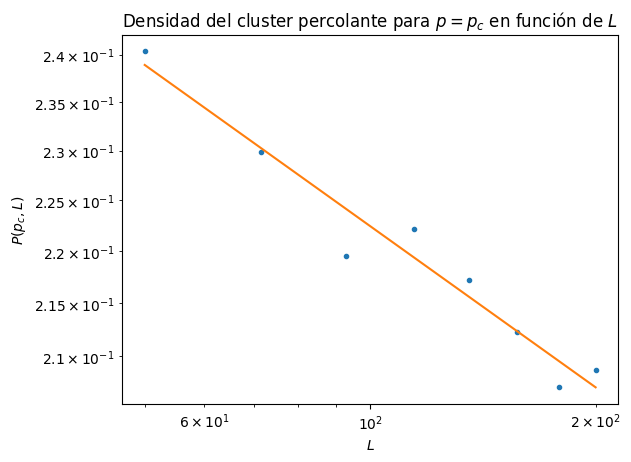

In [ ]:
plt.loglog(Lb, plb, '.')
plt.loglog(Lb, function(Lb, poptbeta[0], poptbeta[1]))
plt.xlabel('$L$')
plt.ylabel('$P(p_c,L)$')
plt.title(r'Densidad del cluster percolante para $p=p_c$ en función de $L$')
plt.show()

Luego el valor encontrado es $β = 0.14 \pm 0.01$.

## Tamaño promedio de los clusters y $γ=43/18$

El **tamaño promedio de los clústers** se define como el tamaño promedio de un clúster conectado a un sitio aleatorio de la red. Es decir

\begin{equation*}
  S(p) = \langle{s}\rangle = \sum_s s\left(\frac{sn(s, p)}{\sum_s sn(s, p)}\right)
\end{equation*}

la suma sobre todos los posibles tamaños de un clúster, del producto entre el tamaño de un clúster y la relación entre la probabilidad de que un sitio pertenezca a un clúster de ese tamaño y la probabilidad de que un sitio pertenezca a un clúster de cualquier tamaño.

A partir del método de escalado finito encontramos la relación

\begin{equation}
    S(p_c, L) \propto \xi^{\gamma/\nu}\left(\frac{L}{\xi}\right)^{\gamma/\nu} \propto L^{\gamma/\nu}
\end{equation}

Por lo que haremos lo mismo que en el cálculo de beta, donde $\gamma=m\nu=4m/3$

[98.1507088, 229.2833801801802, 353.7280122, 499.61499248, 732.4383428762095, 889.1447977658431, 1218.4490178]


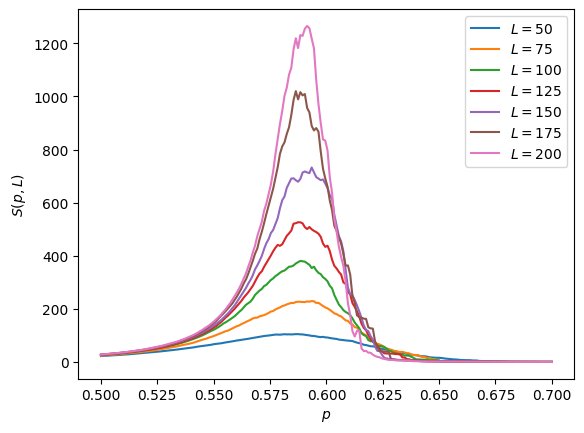

In [ ]:
LLg = [50, 75, 100, 125, 150, 175, 200]
pg = np.linspace(0.5, 0.7, 200)
nLg = len(LLg)
nxg = len(pg)
S = np.zeros((nxg, nLg),float)
pcg = 0.59275
S_pc = []
for iL in range(nLg):
    Lg = LLg[iL]
    M = int(2000*25/Lg)
    for i in range(M):
        z = rn.rand(int(Lg), int(Lg))
        for ip in range(nxg):
            m = z < pg[ip]
            lw, num = sp.ndimage.label(m)
            labelList = np.arange(lw.max() + 1)
            area = sp.ndimage.sum(m, lw, labelList)
            perc_x = np.intersect1d(lw[0,:], lw[-1,:])
            perc = perc_x[np.where(perc_x > 0)]
            if (len(perc) > 0):
                area[perc[0]] = 0
            S[ip, iL] = S[ip, iL] + sum(area*area)
    S[:, iL] = S[:, iL]/(Lg**2*M)
    S_pc.append(S[np.argmax(pg > pcg), iL])

for iL in range(nLg):
    Lg = LLg[iL]
    lab = "$L="+str(Lg)+"$"
    plt.plot(pg, S[:,iL], label = lab)
    plt.ylabel("$S(p,L)$")
    plt.xlabel("$p$")
    plt.legend()

print(S_pc)

In [ ]:
def function(x, a, b):
    return a*x**b

poptgamma, pcovgamma = sp.optimize.curve_fit(function, LLg, S_pc)
perrgamma = np.sqrt(np.diag(pcovgamma))

print((poptgamma[1])*(4/3), (4/3)*perrgamma[1])

2.3760023446560403 0.10219229546083478


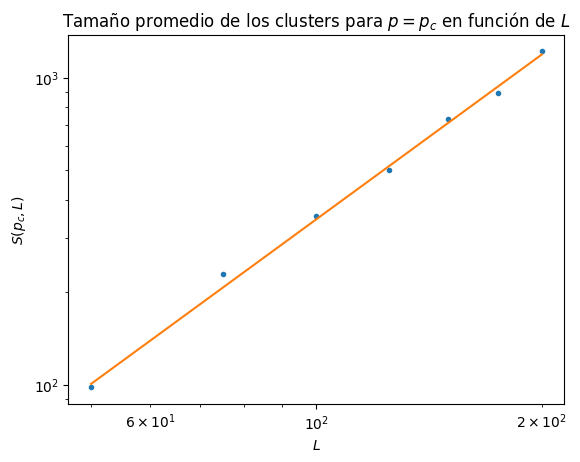

In [ ]:
plt.loglog(LLg, S_pc, '.')
plt.loglog(LLg, function(LLg, poptgamma[0], poptgamma[1]))
plt.xlabel('$L$')
plt.ylabel('$S(p_c, L)$')
plt.title(r'Tamaño promedio de los clusters para $p=p_c$ en función de $L$')
plt.show()

Se encontró: $\gamma = 2.37 \pm 0.10$.

## Dimensión fractal $D$

Para valores de $p = p_c$, la masa del cluster percolante ($M(p_c,L)$) tiene dimensión fractal $D$, que se puede hallar mediante la expresión:

$$
M ∝ L^D
$$

In [ ]:
pc = 0.59275
Nd = 500
Ld = np.logspace(4, 11, num=8, base=2)
Md = np.zeros_like(Ld)

for k in range(len(Ld)):
    for i in range(Nd):
        z = rn.rand(int(Ld[k]),int(Ld[k]))
        m = z < pc
        lw, num = sp.ndimage.label(m)
        perc_y = np.intersect1d(lw[0,:], lw[-1,:])
        perc_x = np.intersect1d(lw[:,0], lw[:,-1])
        perc = np.concatenate((perc_x[np.where(perc_x>0)], perc_y[np.where(perc_y>0)]))
        if len(perc) > 0:
            area = sp.ndimage.sum(m, lw, perc[0])
            Md[k] += area
Md = Md/Nd

In [ ]:
def function(x, a, b):
    return a*x**b

poptd, pcovd = sp.optimize.curve_fit(function, Ld, Md)

print(poptd[1], np.sqrt(abs(np.diag(pcovd)))[1])

1.8642527342734592 0.019291711359320448


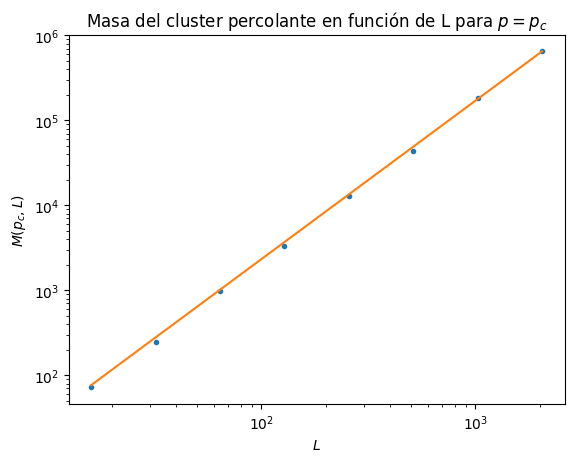

In [ ]:
plt.loglog(Ld, Md, '.')
plt.loglog(Ld, function(Ld, poptd[0], poptd[1]))
plt.xlabel('$L$')
plt.ylabel('$M(p_c,L)$')
plt.title(r'Masa del cluster percolante en función de L para $p=p_c$')
plt.show()

Valor encontrado: $D=1.86 \pm 0.02$